In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
def get_expression_counts(df):
  df_melted = df.melt(var_name='Category', value_name='Gene')
  df_melted_freq = df_melted['Gene'].value_counts().reset_index()
  df_melted_freq.columns = ['Gene', 'Frequency']
  print("A sample of the first few feature counts:")
  print(df_melted_freq.head())

  return df_melted_freq

In [2]:
def show_top_genes(df, n=10):
  top_genes = df.head(n)

  fig, ax = plt.subplots(figsize=(12, 6))
  sns.barplot(x='Gene', y='Frequency', data=top_genes, palette='viridis', hue='Gene', legend=False, ax=ax)
  ax.set_xlabel('Gene')
  ax.set_ylabel('Frequency')
  ax.set_title('Frequency Distribution of Top {} Genes'.format(n))
  fig.tight_layout()
  plt.show();

In [6]:
#Read and clean values based on whether they are low or high expression
#These counts were made on the top 5 lowest and highest expressed features
#Compared to control gourp
full_counts = pd.read_csv('/content/BBS3004 stuff.csv')#(os.path.expanduser('~/Documents/feature_counts.csv'))

#clean
full_counts = full_counts.dropna(how='all')
full_counts = full_counts.dropna(axis=1, how='all')

#filter by high and low counts (for all rows initially)
high_counts = full_counts.filter(regex='^high')
low_counts = full_counts.filter(regex='^low')

# Filter by high and low counts for 'LC' rows
high_counts_lc = full_counts[full_counts['Unnamed: 0'].str.startswith('LC', na=False)].filter(regex='^high')
low_counts_lc = full_counts[full_counts['Unnamed: 0'].str.startswith('LC', na=False)].filter(regex='^low')

# Filter by high and low counts for 'ME' rows
high_counts_me = full_counts[full_counts['Unnamed: 0'].str.startswith('ME', na=False)].filter(regex='^high')
low_counts_me = full_counts[full_counts['Unnamed: 0'].str.startswith('ME', na=False)].filter(regex='^low')

In [14]:
print("Differences between low and high expression:")

high_counts_freq = get_expression_counts(high_counts)
low_counts_freq = get_expression_counts(low_counts)

Differences between low and high expression:
A sample of the first few feature counts:
     Gene  Frequency
0   ROCK1          5
1   DNM1L          4
2    KLF2          3
3  IL27RA          3
4    VSIR          3
A sample of the first few feature counts:
      Gene  Frequency
0  HLA-DRA          7
1    HLA-E          7
2    IL1RN          5
3   LILRB1          5
4     HRAS          4


In [22]:
print("Differences between LC and ME expression:")
high_lc_counts_freq = get_expression_counts(high_counts_lc)
high_me_counts_freq = get_expression_counts(high_counts_me)

Differences between LC and ME expression:
A sample of the first few feature counts:
    Gene  Frequency
0  ROCK1          4
1  DNM1L          3
2  PTPRC          2
3   CBLB          2
4  STAT3          2
A sample of the first few feature counts:
     Gene  Frequency
0  NFE2L2          3
1    KLF2          3
2    VSIR          3
3   IFIT1          2
4  INPPL1          2


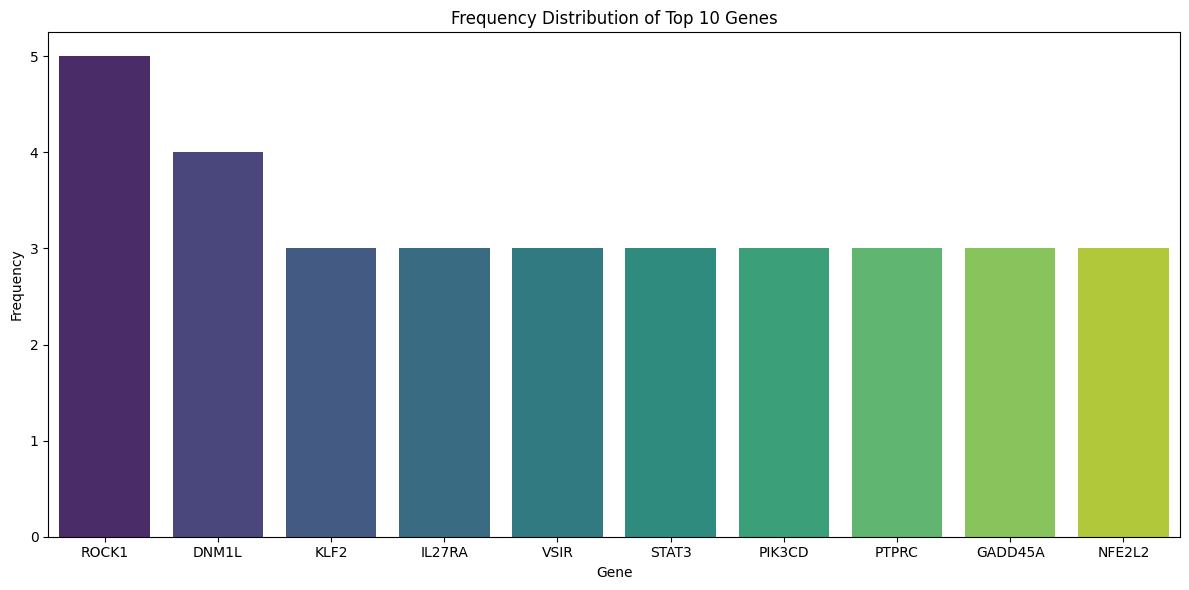

In [38]:
show_top_genes(high_counts_freq)

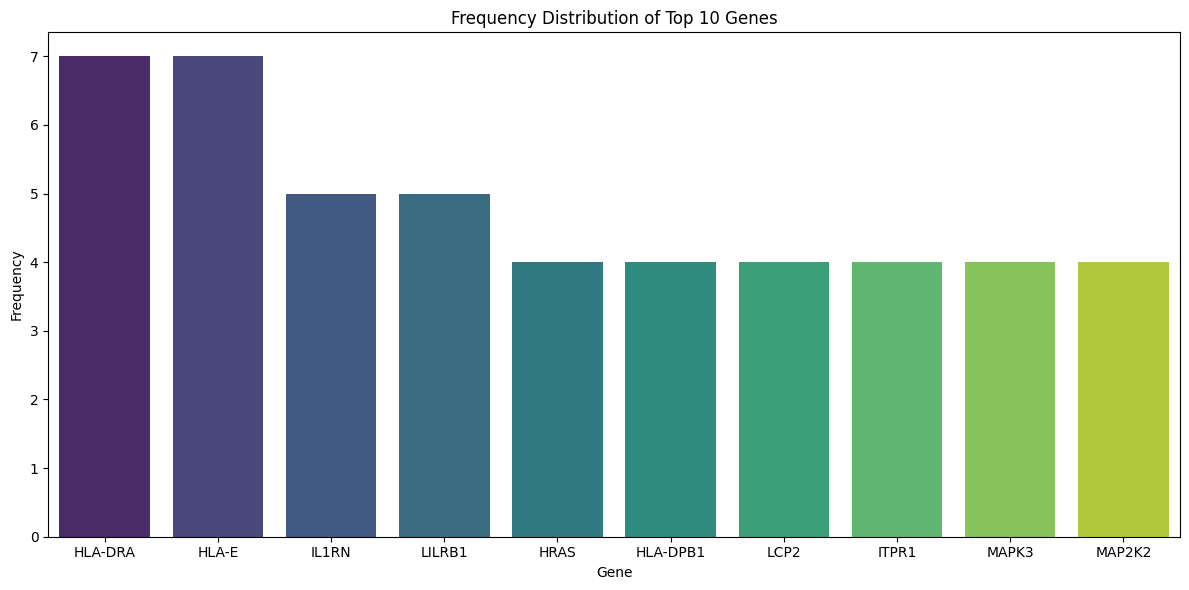

In [37]:
show_top_genes(low_counts_freq)

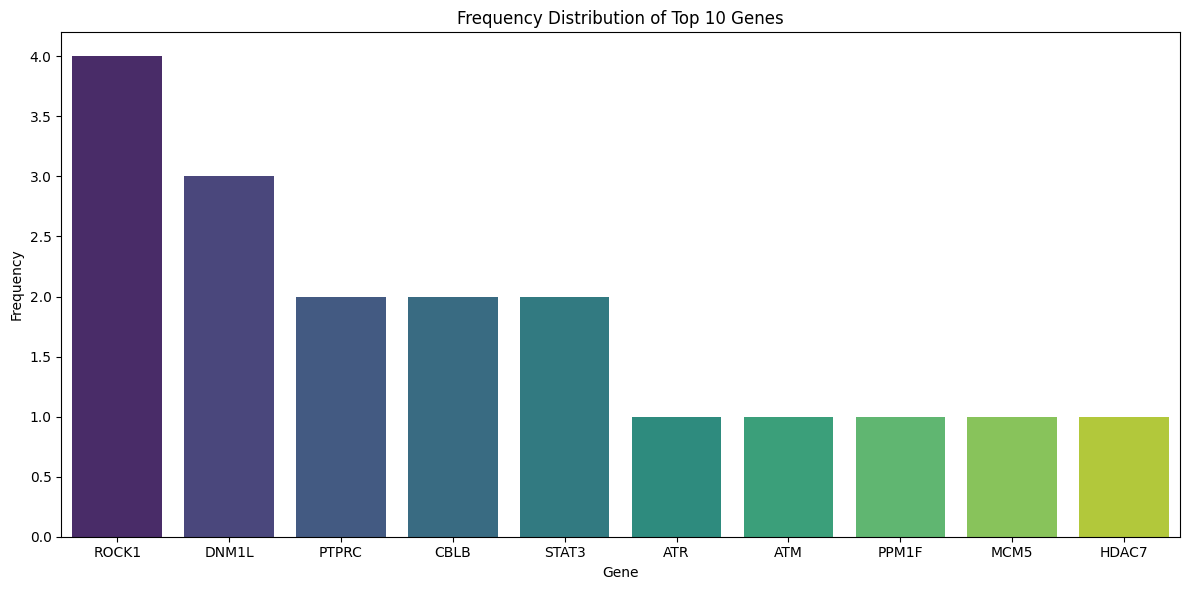

In [23]:
show_top_genes(high_lc_counts_freq)